In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import re

In [2]:
import zipfile

with zipfile.ZipFile('Downloads\Student Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('extract_folder')

df = pd.read_csv('extract_folder/xAPI-Edu-Data.csv')

In [3]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
df.shape

(480, 17)

In [5]:
df['NationalITy'].unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [6]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

### Performing EDA

In [8]:
df.corr() #pearson's correlation

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


In [9]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


#### Observations: 
1. 75% of students raised their hands 75 times or fewer.
2. 75% of students visited 84 resources or fewer.
3. 75% of students viewed 58 announcements or fewer.
4. 75% of students participated in discussions 70 times or fewer.

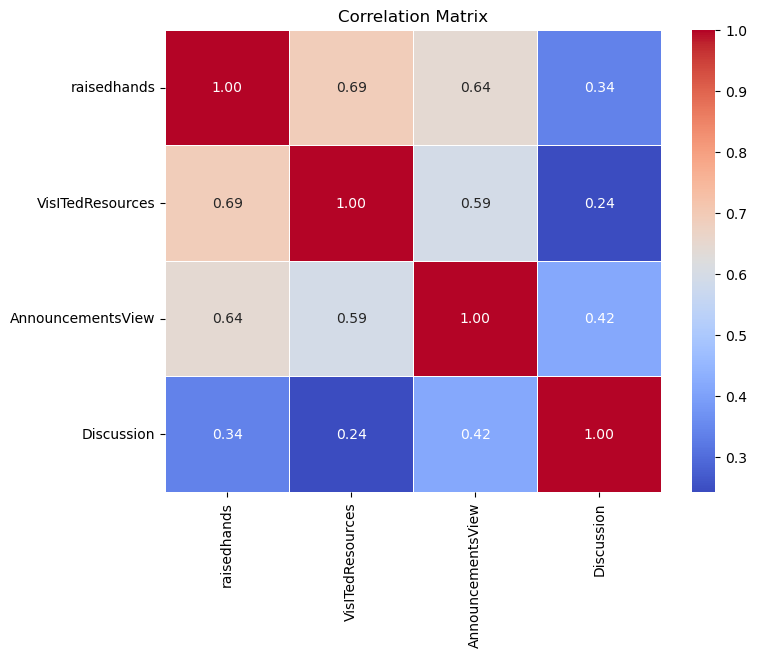

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

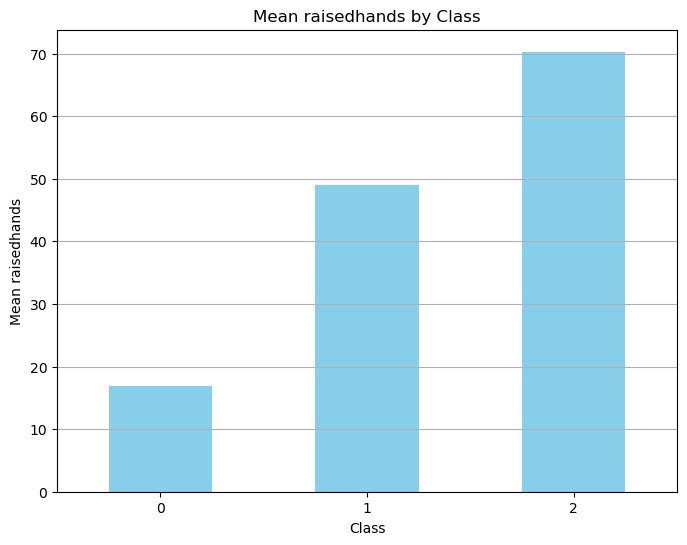

In [31]:
import matplotlib.pyplot as plt

class_raisedhands_mean = df.groupby('Class')['raisedhands'].mean()
plt.figure(figsize=(8, 6))
class_raisedhands_mean.plot(kind='bar', color='skyblue')
plt.title('Mean raisedhands by Class')
plt.xlabel('Class')
plt.ylabel('Mean raisedhands')
plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

#### Relation Between number of times students raised hands and their performance
0 represents low performance, 1 medium performace and 2 high performance

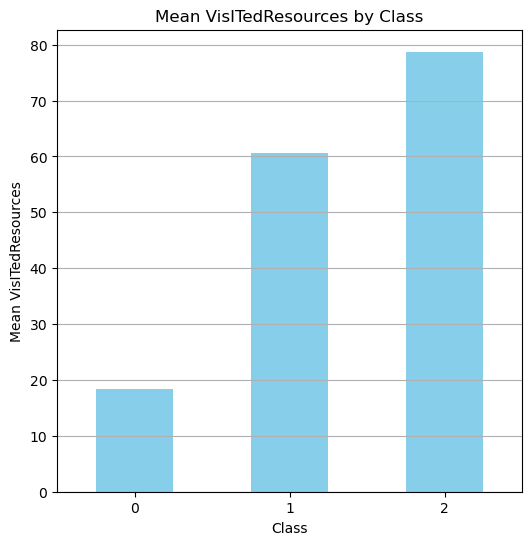

In [34]:
import matplotlib.pyplot as plt

class_raisedhands_mean = df.groupby('Class')['VisITedResources'].mean()
plt.figure(figsize=(6,6))
class_raisedhands_mean.plot(kind='bar', color='skyblue')
plt.title('Mean VisITedResources by Class')
plt.xlabel('Class')
plt.ylabel('Mean VisITedResources')
plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

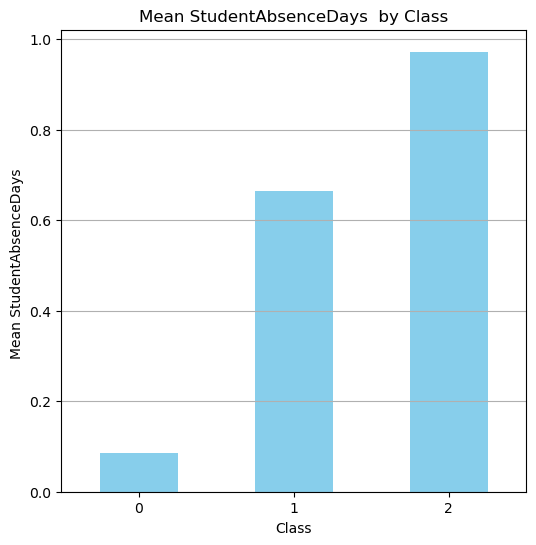

In [36]:
import matplotlib.pyplot as plt

class_raisedhands_mean = df.groupby('Class')['StudentAbsenceDays'].mean()
plt.figure(figsize=(6,6))
class_raisedhands_mean.plot(kind='bar', color='skyblue')
plt.title('Mean StudentAbsenceDays  by Class')
plt.xlabel('Class')
plt.ylabel('Mean StudentAbsenceDays ')
plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

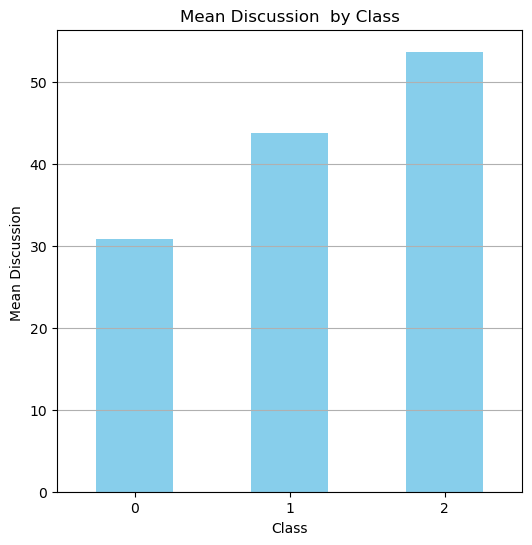

In [38]:
import matplotlib.pyplot as plt

class_raisedhands_mean = df.groupby('Class')['Discussion'].mean()
plt.figure(figsize=(6,6))
class_raisedhands_mean.plot(kind='bar', color='skyblue')
plt.title('Mean Discussion  by Class')
plt.xlabel('Class')
plt.ylabel('Mean Discussion ')
plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

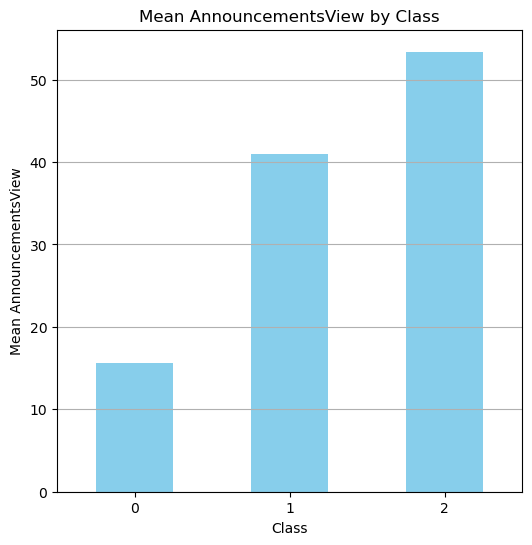

In [39]:
import matplotlib.pyplot as plt

class_raisedhands_mean = df.groupby('Class')['AnnouncementsView'].mean()
plt.figure(figsize=(6,6))
class_raisedhands_mean.plot(kind='bar', color='skyblue')
plt.title('Mean AnnouncementsView by Class')
plt.xlabel('Class')
plt.ylabel('Mean AnnouncementsView')
plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

In [11]:
categorical_unique_counts = df.select_dtypes(include=['object']).nunique()
print(categorical_unique_counts)

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64


In [12]:
df.drop('PlaceofBirth', axis=1, inplace = True)

In [13]:
#Preprocessing
#Dealing with Binary Categories
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])  
df['Relation'] = label_encoder.fit_transform(df['Relation'])  
df['ParentAnsweringSurvey'] = label_encoder.fit_transform(df['ParentAnsweringSurvey'])  
df['ParentschoolSatisfaction'] = label_encoder.fit_transform(df['ParentschoolSatisfaction'])  
df['StudentAbsenceDays'] = label_encoder.fit_transform(df['StudentAbsenceDays'])  
df['Semester'] = label_encoder.fit_transform(df['Semester'])  

In [14]:
df.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,KW,lowerlevel,G-04,A,IT,0,0,15,16,2,20,1,1,1,M
1,1,KW,lowerlevel,G-04,A,IT,0,0,20,20,3,25,1,1,1,M
2,1,KW,lowerlevel,G-04,A,IT,0,0,10,7,0,30,0,0,0,L
3,1,KW,lowerlevel,G-04,A,IT,0,0,30,25,5,35,0,0,0,L
4,1,KW,lowerlevel,G-04,A,IT,0,0,40,50,12,50,0,0,0,M


In [15]:
nationality_mapping = {'KW': 0, 'lebanon': 1, 'Egypt': 2, 'SaudiArabia': 3, 'USA': 4,
                       'Jordan': 5, 'venzuela': 6, 'Iran': 7, 'Tunis': 8, 'Morocco': 9,
                       'Syria': 10, 'Palestine': 11, 'Iraq': 12, 'Lybia': 13}
df['NationalITy'] = df['NationalITy'].map(nationality_mapping)

stage_mapping = {'lowerlevel': 0, 'MiddleSchool': 1, 'HighSchool': 2}
df['StageID'] = df['StageID'].map(stage_mapping)

grade_mapping = {'G-04': 4, 'G-07': 7, 'G-08': 8, 'G-06': 6, 'G-05': 5,
                 'G-09': 9, 'G-12': 12, 'G-11': 11, 'G-10': 10, 'G-02': 2}
df['GradeID'] = df['GradeID'].map(grade_mapping)

section_mapping = {'A': 0, 'B': 1, 'C': 2}
df['SectionID'] = df['SectionID'].map(section_mapping)

In [16]:
df = pd.get_dummies(df, columns=['Topic'], drop_first=True)

In [17]:
df.head()

,gender,NationalITy,StageID,GradeID,SectionID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,...,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish
0,1,0,0,4,0,0,0,15,16,2,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,4,0,0,0,20,20,3,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,4,0,0,0,10,7,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,4,0,0,0,30,25,5,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,4,0,0,0,40,50,12,...,0,0,0,0,0,1,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    int32 
 1   NationalITy               480 non-null    int64 
 2   StageID                   480 non-null    int64 
 3   GradeID                   480 non-null    int64 
 4   SectionID                 480 non-null    int64 
 5   Semester                  480 non-null    int32 
 6   Relation                  480 non-null    int32 
 7   raisedhands               480 non-null    int64 
 8   VisITedResources          480 non-null    int64 
 9   AnnouncementsView         480 non-null    int64 
 10  Discussion                480 non-null    int64 
 11  ParentAnsweringSurvey     480 non-null    int32 
 12  ParentschoolSatisfaction  480 non-null    int32 
 13  StudentAbsenceDays        480 non-null    int32 
 14  Class                     

In [19]:
#Dealing with the target variable
class_mapping = {'L': 0, 'M': 1, 'H': 2}
df['Class'] = df['Class'].map(class_mapping)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Class']) 
y = df['Class']  

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8020833333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        26
           1       0.85      0.73      0.79        48
           2       0.71      0.77      0.74        22

    accuracy                           0.80        96
   macro avg       0.79      0.82      0.80        96
weighted avg       0.81      0.80      0.80        96



### Performace:Logistic Regression - Accuracy: 80%, Precision: 0.79,  recall: 0.82, f1-score: 0.80, support: 96

In [22]:
from sklearn.svm import SVC
X = pd.DataFrame(X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Support Vector Classifier (SVC):")
print("Accuracy:", accuracy_svc)
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

Support Vector Classifier (SVC):
Accuracy: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        26
           1       0.80      0.77      0.79        48
           2       0.74      0.64      0.68        22

    accuracy                           0.79        96
   macro avg       0.78      0.79      0.78        96
weighted avg       0.79      0.79      0.79        96



### Performace: SVM - Accuracy: 79%, Precision: 0.78, recall: 0.79, f1-score: 0.78, support:96

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

best_decision_tree = DecisionTreeClassifier(**best_params, random_state=42)
best_decision_tree.fit(X_train, y_train)
y_pred = best_decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nDecision Tree Classifier (with Hyperparameter Tuning):")
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Decision Tree Classifier (with Hyperparameter Tuning):
Accuracy: 0.84375
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        26
           1       0.85      0.83      0.84        48
           2       0.77      0.77      0.77        22

    accuracy                           0.84        96
   macro avg       0.84      0.84      0.84        96
weighted avg       0.84      0.84      0.84        96



### Performace: Decision Tree Classifier - Accuracy: 84%, Precision: 0.84, recall: 0.84, f1-score: 0.84, support: 96

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'n_estimators': [50, 100, 200],           
    'max_depth': [None, 10, 20, 30],           
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4],             
    'max_features': ['auto', 'sqrt', 'log2']  
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\purvi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
396 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\purvi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\purvi\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\purvi\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\purvi\anaconda3\lib\site-packa

Accuracy: 0.8645833333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.84      0.90      0.87        48
           2       0.88      0.68      0.77        22

    accuracy                           0.86        96
   macro avg       0.87      0.85      0.85        96
weighted avg       0.87      0.86      0.86        96



### Performace: Random Forest Classifier - Accuracy: 86%, Precision: 0.87, recall: 0.86, f1-score: 0.86, support: 96

In [26]:
from sklearn.neural_network import MLPClassifier

mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50), (50, 100)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

mlp_classifier = MLPClassifier(random_state=42)
mlp_grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=mlp_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
mlp_grid_search.fit(X_train, y_train)

best_mlp_params = mlp_grid_search.best_params_
best_mlp_score = mlp_grid_search.best_score_

#print("Best Parameters for MLP:", best_mlp_params)
#print("Best Score for MLP:", best_mlp_score)

best_mlp_classifier = MLPClassifier(**best_mlp_params, random_state=42)

best_mlp_classifier.fit(X_train, y_train)

y_pred_mlp = best_mlp_classifier.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy of MLP:", accuracy_mlp)
print("Classification Report for MLP:")
print(classification_report(y_test, y_pred_mlp))

C:\Users\purvi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters for MLP: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best Score for MLP: 0.7421736158578265
Accuracy of MLP: 0.8229166666666666
Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        26
           1       0.86      0.77      0.81        48
           2       0.74      0.77      0.76        22

    accuracy                           0.82        96
   macro avg       0.81      0.84      0.82        96
weighted avg       0.83      0.82      0.82        96



C:\Users\purvi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Performace: MLP - Accuracy: 82%, Precision: 0.83, recall: 0.82, f1-score: 0.83, support: 96

In [ ]:
!python -m pip install --upgrade pip